In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
train=pd.read_csv('D:\pe_train.csv')
test=pd.read_csv('D:\pe_test.csv')   

In [3]:
train.head()

,AT,V,AP,RH,PE
0,29.07,72.51,1009.24,58.38,449.371855
1,32.38,67.17,1006.97,60.04,450.861043
2,19.29,67.71,1007.94,63.71,460.894029
3,16.45,41.48,1016.64,45.21,467.577314
4,21.43,46.97,1013.94,61.25,469.805723


In [7]:
test.head()

,AT,V,AP,RH
0,16.98,53.16,1013.95,82.80
1,9.60,41.03,1021.01,69.03
2,6.11,38.68,1017.53,79.23
3,12.34,43.22,1009.28,78.23
4,27.67,59.14,1016.51,61.20


In [8]:
train.isnull().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [9]:
test.isnull().sum()

AT    0
V     0
AP    0
RH    0
dtype: int64

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
AT    9568 non-null float64
V     9568 non-null float64
AP    9568 non-null float64
RH    9568 non-null float64
PE    9568 non-null float64
dtypes: float64(5)
memory usage: 373.9 KB


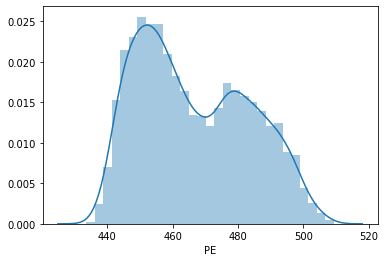

In [11]:
sns.distplot(train['PE'])

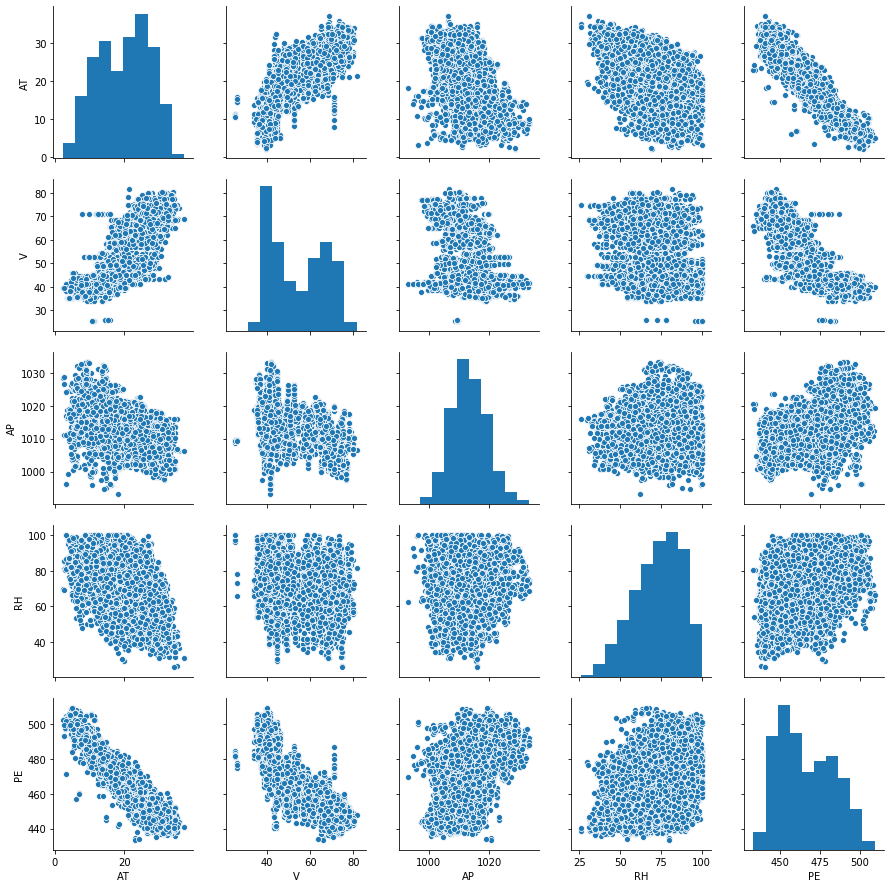

In [12]:
sns.pairplot(train)

In [4]:
q1 = train.quantile(0.25)
q3 = train.quantile(0.75)
iqr = q3-q1
train2 = train[~((train < (q1 - 1.5 * iqr))| (train > (q3 + 1.5 * iqr))).any(axis =1)]

In [5]:
train2.shape

(9493, 5)

In [6]:
train.shape

(9568, 5)

In [7]:
Q1 = test.quantile(0.25)
Q3 = test.quantile(0.75)
IQR = Q3 - Q1
test2 = test[~((test < (Q1 - 1.5 * IQR))| (test > (Q3 + 1.5 * IQR))).any(axis =1)]

In [8]:
test.shape

(38272, 4)

In [9]:
test2.shape

(37849, 4)

In [10]:
from sklearn.model_selection import cross_val_score,KFold


In [11]:
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,ExtraTreesRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor

In [12]:
y = train2['PE']

In [13]:
train02 = train2.drop('PE',axis = 1)

In [14]:
sc = StandardScaler()
trains2 = sc.fit_transform(train02)
tests2  = sc.transform(test2)


In [38]:
lr = LinearRegression()
kfold = KFold(shuffle=True,n_splits=3,random_state=42)
lr_results = cross_val_score(lr, trains2, y_train,cv=kfold, scoring='neg_mean_squared_error')

In [34]:
rmsefolds=(np.sqrt(np.abs(lr_results)))
rmse_lr_be=np.mean(rmsefolds)
print('Model bias error for LR')
print(rmse_lr)
rmse_lr_ve=np.std(rmsefolds,ddof=1)
print('Variance error')
print(rmse_lr_ve)

Model bias error for LR
4.663976290821495
Variance error
0.05213732030164106


In [37]:
lr = LinearRegression()
kfold = KFold(shuffle=True,n_splits=3,random_state=42)
lr_results1 = cross_val_score(lr, tests2, ypred_lr,cv=kfold, scoring='neg_mean_squared_error')


In [39]:
rmsetest=(np.sqrt(np.abs(lr_results1)))
rmse_lr_test=np.mean(rmsetest)
print('Model bias error for LR')
print(rmse_lr_test)
rmse_lr_test_ve=np.std(rmsetest,ddof=1)
print('Variance error')
print(rmse_lr_test_ve)

Model bias error for LR
8.983998804154638e-14
Variance error
6.594418052913225e-14


In [15]:
y_train = train['PE']
train01 = train.drop('PE',axis = 1) #with outliers


In [16]:
trains = sc.fit_transform(train01)
tests = sc.transform(test)

In [18]:
lr = LinearRegression()

In [19]:
kfold = KFold(shuffle=True,n_splits=3,random_state=42)
lr_results2 = cross_val_score(lr, trains, y_train,cv=kfold, scoring='neg_mean_squared_error')


In [20]:
rmse=(np.sqrt(np.abs(lr_results2)))
rmse_lrn=np.mean(rmse)
print('Model bias error for LR with outliers')
print(rmse_lrn)

Model bias error for LR with outliers
4.658472917220703


In [46]:
print('ve_lr :',np.std(rmse,ddof = 1))

ve_lr : 0.02986480930243811


In [61]:
from sklearn. model_selection import GridSearchCV

In [76]:
params = {'n_estimators':np.arange(1,100),'max_depth':np.arange(1,10),'criterion':['mse'],'random_state':[0]}
rf_cv = GridSearchCV(rf,params,cv = 3,scoring = 'neg_mean_squared_error')
rf_cv.fit(trains,y_train1)

KeyboardInterrupt: 

In [22]:
RF_ve=[]
RF_be = []
for i in np.arange(5,100):
  RF=RandomForestRegressor(criterion='mse',n_estimators=i,random_state=42, min_samples_split=4)
  kfold = KFold(shuffle=True,n_splits=3,random_state=42)
  mse=cross_val_score(RF,trains,y_train,cv=kfold,scoring='neg_mean_squared_error')
  rmse=np.sqrt(np.abs(mse))
  RF_ve.append(np.std(rmse,ddof=1))
  RF_be.append(np.mean(rmse))

In [23]:
np.min(RF_ve),np.argmin(RF_ve)

(0.03446145403007895, 32)

In [24]:
np.min(RF_be),np.argmin(RF_be)

(3.045288703448725, 91)

In [27]:
rf1 = RandomForestRegressor(n_estimators = 95,criterion='mse',random_state=0)


In [25]:
rf = RandomForestRegressor(n_estimators = 92,n_jobs = -1,random_state=42, min_samples_split=4)
kfold = KFold(shuffle=True,n_splits=3,random_state=42)
rf_results = cross_val_score(rf, trains, y_train,cv=kfold, scoring='neg_mean_squared_error')

In [26]:
rmse_rf=(np.sqrt(np.abs(rf_results)))
rmse_rfn=np.mean(rmse_rf)
print('Model bias error for RF with outliers')
print(rmse_rfn)
print('ve_rf :',np.std(rmse_rf,ddof = 1))

Model bias error for RF with outliers
3.0468979455418377
ve_rf : 0.052229807921985


In [83]:
rmse_rfa=(np.sqrt(np.abs(rf_wo)))
rmse_rfwo=np.mean(rmse_rfa)
print('Model bias error for RF without outliers')
print(rmse_rfwo)
print('ve_rf :',np.std(rmse_rfa,ddof = 1))

Model bias error for RF without outliers
3.0274641054711444
ve_rf : 0.03158708770695583


In [ ]:
model_rf = rf.fit(trains,y_train1)
ypred_rf = model_rf.predict(tests)

In [ ]:
ypredrf = pd.DataFrame(ypred_rf)
ypredrf.to_excel("D:/pe1.xlsx",index=False)

In [28]:
kfold = KFold(shuffle=True,n_splits=3,random_state=0)
rf_results1 = cross_val_score(rf1, trains, y_train,cv=kfold, scoring='neg_mean_squared_error')

In [29]:
rmse_rf1=(np.sqrt(np.abs(rf_results1)))
rmse_rfn1=np.mean(rmse_rf1)
print('Model bias error for RF1 with outliers')
print(rmse_rfn1)
print('ve_rf1 :',np.std(rmse_rf1,ddof = 1))

Model bias error for RF1 with outliers
3.0127382169180557
ve_rf1 : 0.10399701590489889


In [39]:

from xgboost import XGBRegressor
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100)
xgb_model=xgb.fit(trains,y_train)


In [41]:
xgb_results= cross_val_score(xgb, trains, y_train,cv=5, scoring='neg_root_mean_squared_error')


In [42]:
np.mean(xgb_results)

-2.726366453820058

In [52]:
y_pred1 = xgb_model.predict(tests)


In [43]:
grd = GradientBoostingRegressor(learning_rate =0.01,n_estimators=5000,max_depth=6)
grd_model=grd.fit(trains,y_train)

In [47]:
grd_results= cross_val_score(grd, trains, y_train,cv=5, scoring='neg_root_mean_squared_error')

In [48]:
np.mean(grd_results)

-2.6905707920339292

In [51]:
y_pred2 = grd_model.predict(tests)

In [53]:
! pip install lightgbm

In [64]:
X = train.drop('PE',axis = 1)
y = train['PE']

In [65]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=7)

In [66]:
X_trains = sc.fit_transform(X_train)
X_tests = sc.transform(X_test)

In [72]:

from lightgbm import LGBMRegressor
lgb_fit_params={"early_stopping_rounds":100, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_tests,y_test)],
            'eval_names': ['valid'],
            'verbose':100
           }
lgb_params = {'boosting_type': 'gbdt',
 'objective': 'regression',
 'metric': 'rmse',
 'verbose': 0,
 'bagging_fraction': 0.8,
 'bagging_freq': 1,
 'lambda_l1': 0.01,
 'lambda_l2': 0.01,
 'learning_rate': 0.01,
 'max_bin': 255,
 'max_depth': 6,
 'min_data_in_bin': 1,
 'min_data_in_leaf': 1,
 'num_leaves': 31}


In [19]:
from lightgbm import LGBMRegressor

In [75]:

from lightgbm import LGBMRegressor

lgb = LGBMRegressor(n_estimators=10000, **lgb_params, random_state=123456789, n_jobs=-1)
lgb.fit(X_trains, y_train, **lgb_fit_params)
lgb.best_iteration_

Training until validation scores don't improve for 100 rounds
[100]	valid's rmse: 7.39079
[200]	valid's rmse: 4.55953
[300]	valid's rmse: 3.91115
[400]	valid's rmse: 3.72033
[500]	valid's rmse: 3.61788
[600]	valid's rmse: 3.54634
[700]	valid's rmse: 3.48541
[800]	valid's rmse: 3.43419
[900]	valid's rmse: 3.39139
[1000]	valid's rmse: 3.3526
[1100]	valid's rmse: 3.31729
[1200]	valid's rmse: 3.28258
[1300]	valid's rmse: 3.24867
[1400]	valid's rmse: 3.21567
[1500]	valid's rmse: 3.18847
[1600]	valid's rmse: 3.16202
[1700]	valid's rmse: 3.13638
[1800]	valid's rmse: 3.1117
[1900]	valid's rmse: 3.09086
[2000]	valid's rmse: 3.07205
[2100]	valid's rmse: 3.05345
[2200]	valid's rmse: 3.03853
[2300]	valid's rmse: 3.02331
[2400]	valid's rmse: 3.00813
[2500]	valid's rmse: 2.99295
[2600]	valid's rmse: 2.97928
[2700]	valid's rmse: 2.96744
[2800]	valid's rmse: 2.95508
[2900]	valid's rmse: 2.9427
[3000]	valid's rmse: 2.93155
[3100]	valid's rmse: 2.92148
[3200]	valid's rmse: 2.91231
[3300]	valid's rmse: 2

9266

In [76]:

clf_lgb=LGBMRegressor(n_estimators=int(lgb.best_iteration_*1.2), **lgb_params)
lgb_model=clf_lgb.fit(trains, y)

In [77]:
lgb_score=cross_val_score(X=trains,y=y,estimator=clf_lgb,scoring='neg_root_mean_squared_error',cv=5)

In [78]:
np.mean(lgb_score)

-2.573120965645183

In [79]:
y_pred3 = lgb_model.predict(tests)

In [80]:

y_pred=(0.1*y_pred1)+(y_pred2*0.1)+(y_pred3*0.8)
y_pred

array([471.63662543, 494.46716142, 495.91232078, ..., 471.62104207,
       444.60506491, 464.62421043])

In [83]:
pe1=pd.DataFrame(np.round(abs(y_pred),3),columns=['PE'])

In [85]:

pe1.to_excel('D:\pe1.xlsx',index=False)   #2.29

In [16]:
from xgboost import XGBRegressor  # without outliers
xgb=XGBRegressor(
 learning_rate =0.01,
 n_estimators=6000,
 max_depth=6,
 colsample_bytree=0.8,
 seed=100)
xgb_model1=xgb.fit(trains2,y)

In [17]:
xgb_results1= cross_val_score(xgb, trains2, y,cv=5, scoring='neg_root_mean_squared_error')

-2.6890128265447393